<a href="https://colab.research.google.com/github/varshith-sriramoju/Machine-Learning-Projects/blob/main/Task_2_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Price of Used Cars

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Loading the raw data

In [52]:
car_data = pd.read_csv("car_price_data1.csv")

In [53]:
car_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW  4200.00      sedan      277     2.00      Petrol   
1  Mercedes-Benz  7900.00        van      427     2.90      Diesel   
2  Mercedes-Benz 13300.00      sedan      358     5.00         Gas   
3           Audi 23000.00  crossover      240     4.20      Petrol   
4         Toyota 18300.00  crossover      120     2.00      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

# Preprocessing

### Exploring the descriptive statistics of the variables

In [54]:
car_data.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       NaN      6      NaN      NaN           4   
top     Volkswagen       NaN  sedan      NaN      NaN      Diesel   
freq           936       NaN   1649      NaN      NaN        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year    Model  
count          4345 4345.00     4345  
unique            2     NaN      312  
top             yes     NaN  E-Class  
freq           3947     NaN      199  
mean            NaN 2006.55      NaN  
std             NaN    6.72      NaN  
min             NaN 1969.00      NaN  
25%             NaN 2003.00      NaN  
50%             NaN 2008.00      NaN  
75%             NaN 2012.00      NaN  
max             NaN 2016.00      NaN

In [55]:
# Information of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Drop features that are not required to build our model

In [56]:
# In Model column There are three hundred and twelve unique models.
# That's something really hard to implement and a regression that would mean more than 300 dummies,
df = car_data.drop(labels='Model', axis=1)

### Check for any missing value in data set and treat it

In [57]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [58]:
# so we are simply droping all nan values, and this is not always recommended,
# however when we remove less than 5% of the data, then it is okay
df_no_mv = df.dropna()

## Data exploration

#### Exploring the PDFs
The probability distribution will show us how that variable is distributed

<ipython-input-59-9a8cebee1667>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

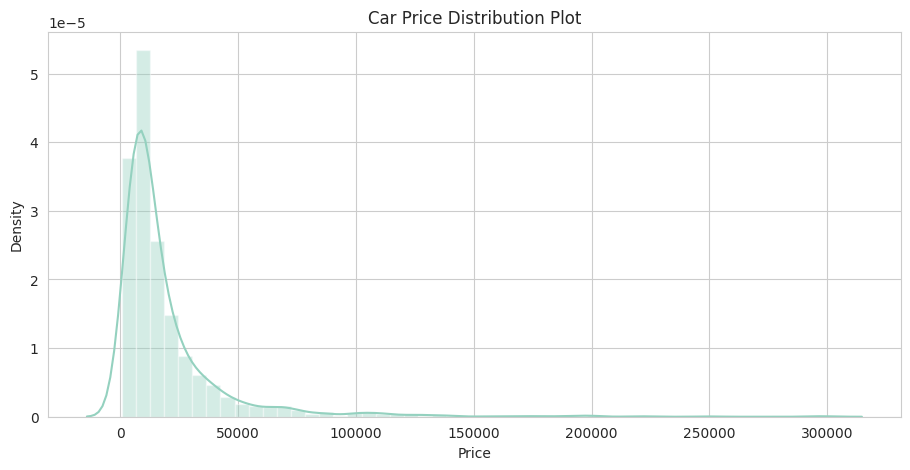

In [59]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(df_no_mv['Price'])
plt.title('Car Price Distribution Plot')

<ipython-input-60-00a383362299>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Year'])
<ipython-input-60-00a383362299>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Mileage'])
<ipython-input-60-00a383362299>:12: UserWarning: 

`distplot` is a deprecated function and will

Text(0.5, 1.0, 'EngineV Distribution Plot')

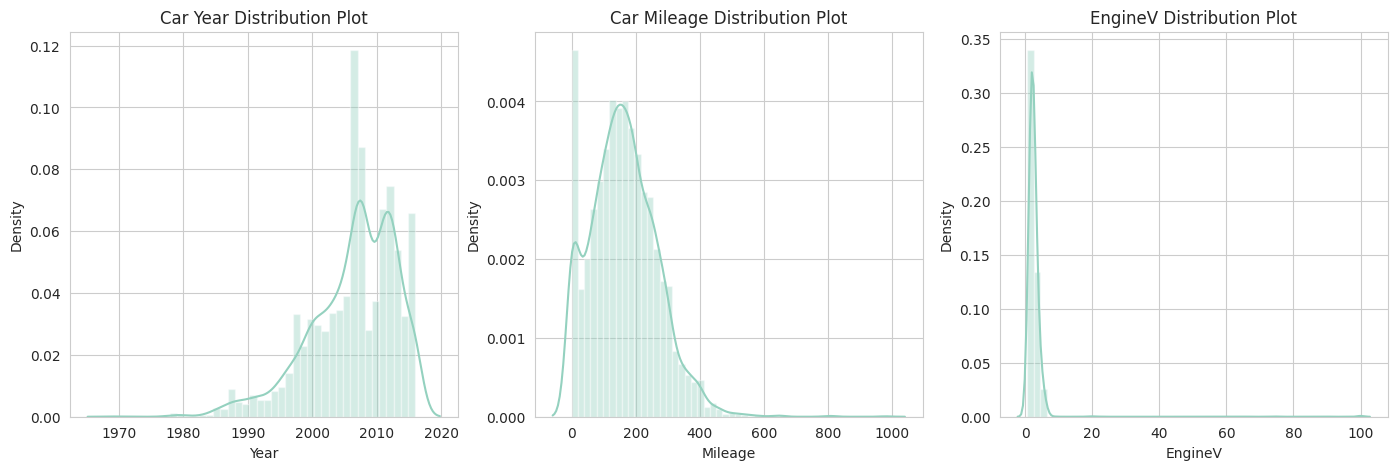

In [60]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df_no_mv['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

* Now its clear that some outliers presents in Price, year, Mileage and EngineV numerical veriables

### Dealing with outliers

* Price column

In [61]:
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df_no_mv['Price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df_no_mv[df_no_mv['Price']<q]

<ipython-input-62-73a7e80ebe58>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

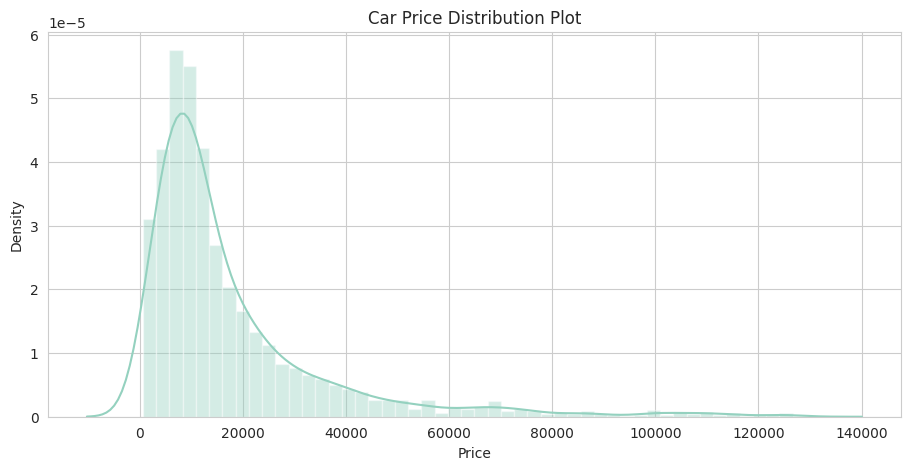

In [62]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

However, there are much fewer outliers

 * Mileage Column

<ipython-input-63-0d970ddd104a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Mileage'])


Text(0.5, 1.0, 'Car Mileage Distribution Plot')

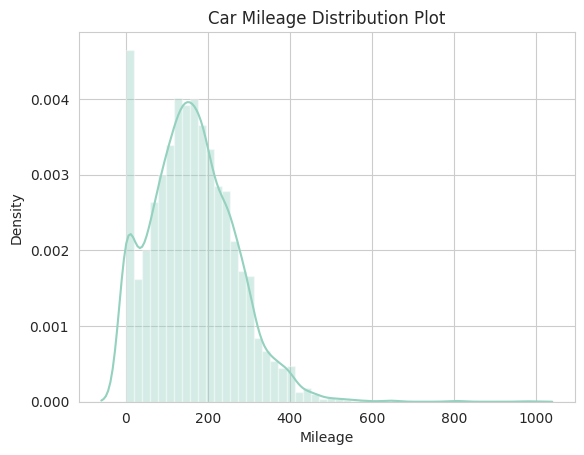

In [63]:
#Now we can treat the other numerical variables outlier in a similar way
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

In [64]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<ipython-input-65-3a49e83d0974>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

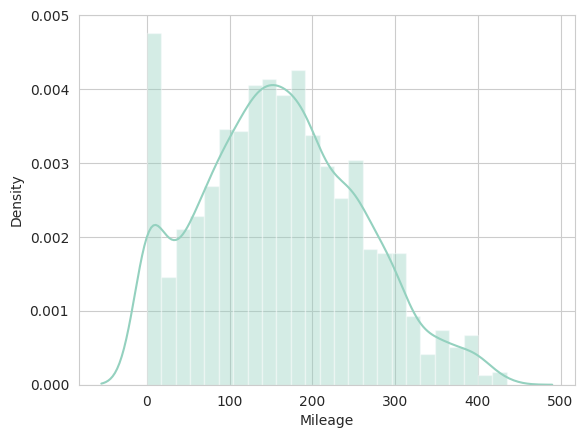

In [65]:
# Hurray this plot looks kind of normal
sns.distplot(data_2['Mileage'])

* Year Column

<ipython-input-66-904857ec6e1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

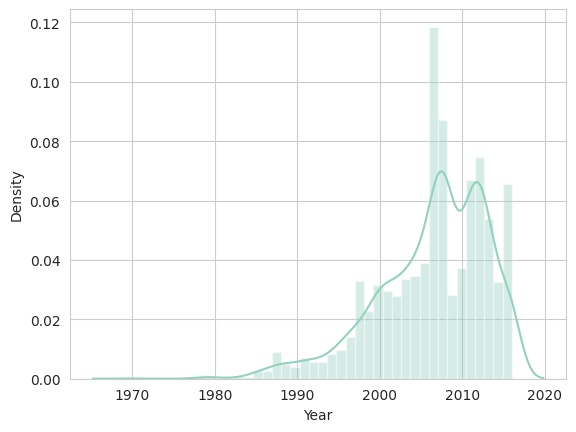

In [66]:
# In this scenario outliers are on the low end
sns.distplot(df_no_mv['Year'])

In [67]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<ipython-input-68-89784abcafb6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

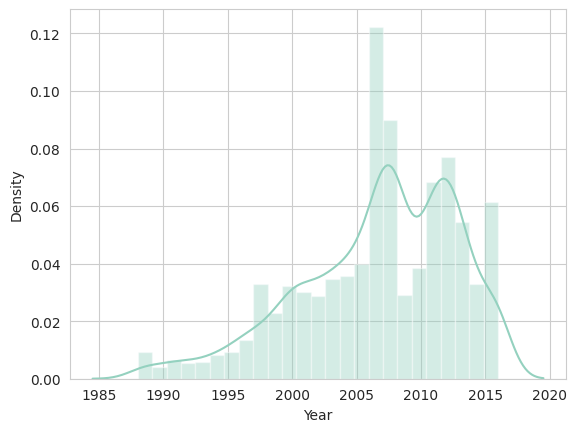

In [68]:
sns.distplot(data_3['Year'])

* EngineV Column

<ipython-input-69-2eb5908307bd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['EngineV'])


Text(0.5, 1.0, 'EngineV Distribution Plot')

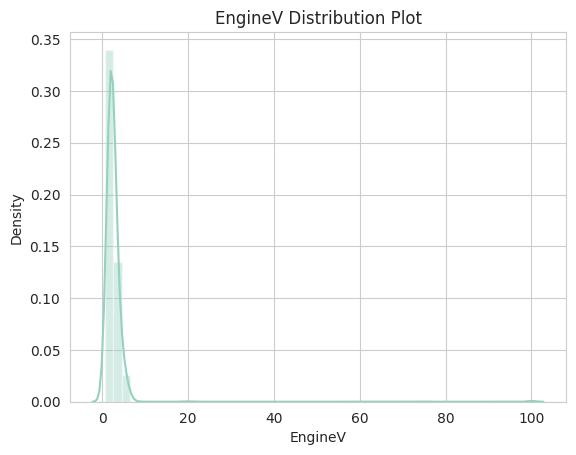

In [69]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

In [70]:
# Car engine volumes are usually (always?) below 6.5l, You can google it
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_4 = data_3[data_3['EngineV']<6.5]

<ipython-input-71-e459b90ff244>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

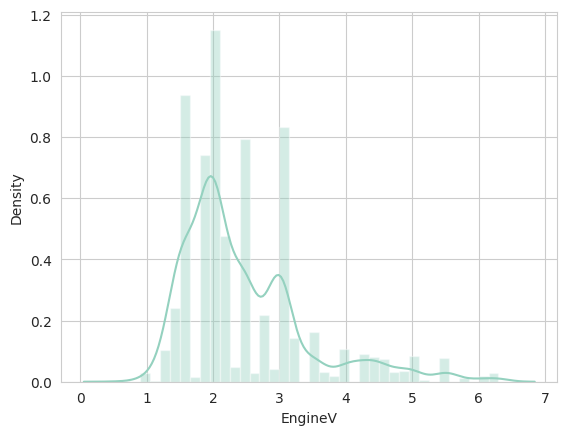

In [71]:
# now its looks kind of normal
sns.distplot(data_4['EngineV'])

In [72]:
# Reset index
cleaned_data = data_4.reset_index(drop=True)

In [73]:
# once again checking discriptive statistics
cleaned_data.describe()

Price  Mileage  EngineV    Year
count   3867.00  3867.00  3867.00 3867.00
mean   18194.46   160.54     2.45 2006.71
std    19085.86    95.63     0.95    6.10
min      800.00     0.00     0.60 1988.00
25%     7200.00    91.00     1.80 2003.00
50%    11700.00   157.00     2.20 2008.00
75%    21700.00   225.00     3.00 2012.00
max   129222.00   435.00     6.30 2016.00

## lets check the linearity using a scatter plot

Text(0.5, 1.0, 'Price and EngineV')

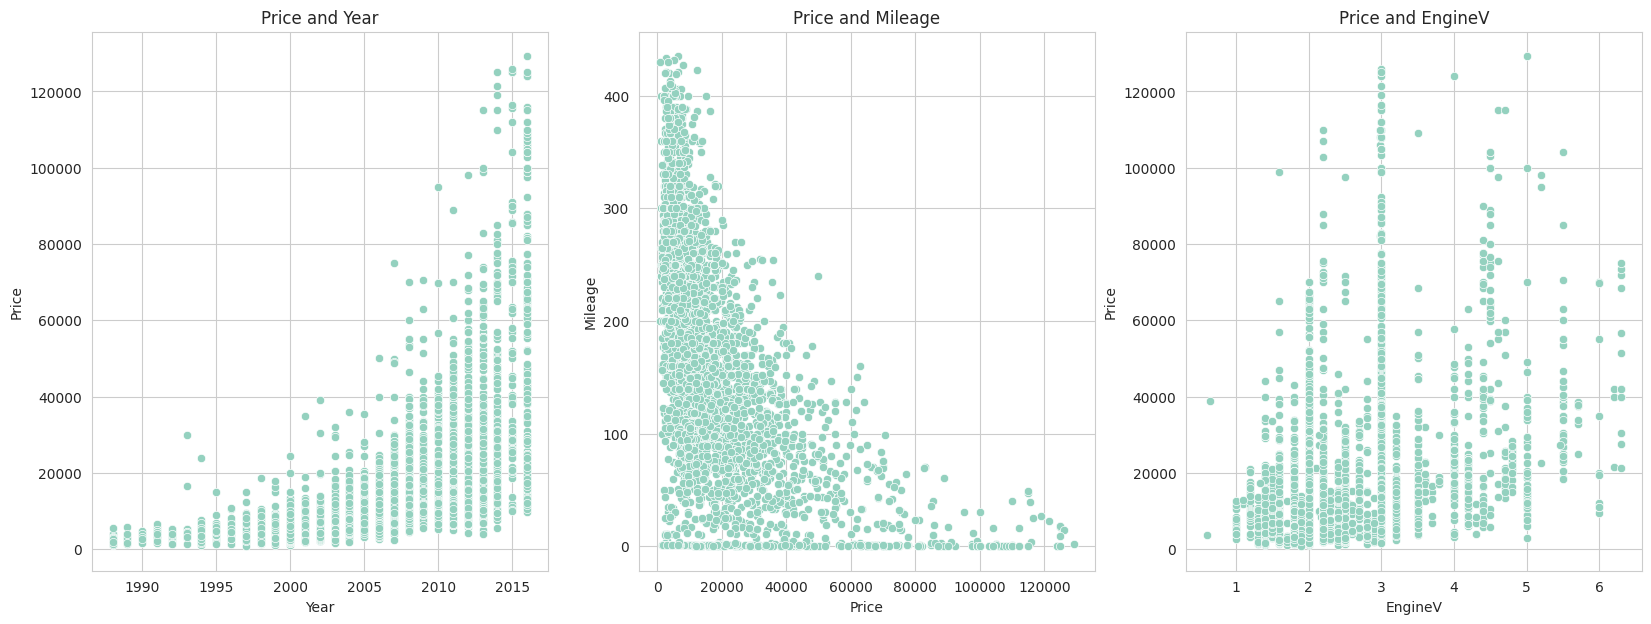

In [74]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV")

<ipython-input-75-4eb4551739b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

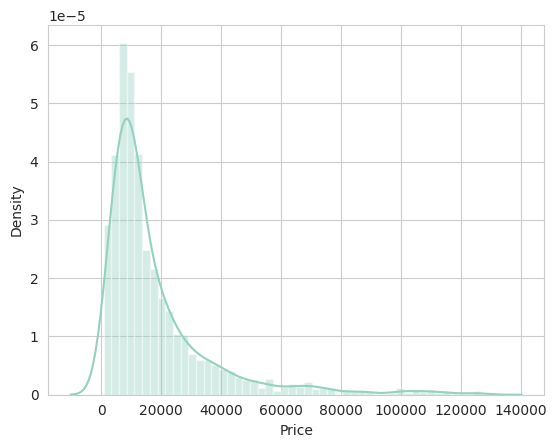

In [75]:
#recall the distribution plot of price
sns.distplot(cleaned_data['Price'])

See The patterns are quite exponentials in this condition **log transformation is a common way to deal with this issue.** log transformation is especially useful when facing exponential scatter plots like we do now.

## Let's transform 'Price' with a log transformation

In [76]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cleaned_data['Price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW  4200.00      sedan      277     2.00      Petrol   
1  Mercedes-Benz  7900.00        van      427     2.90      Diesel   
2  Mercedes-Benz 13300.00      sedan      358     5.00         Gas   
3           Audi 23000.00  crossover      240     4.20      Petrol   
4         Toyota 18300.00  crossover      120     2.00      Petrol   

  Registration  Year  log_price  
0          yes  1991       8.34  
1          yes  1999       8.97  
2          yes  2003       9.50  
3          yes  2007      10.04  
4          yes  2011       9.81

Text(0.5, 1.0, 'Log price and EngineV')

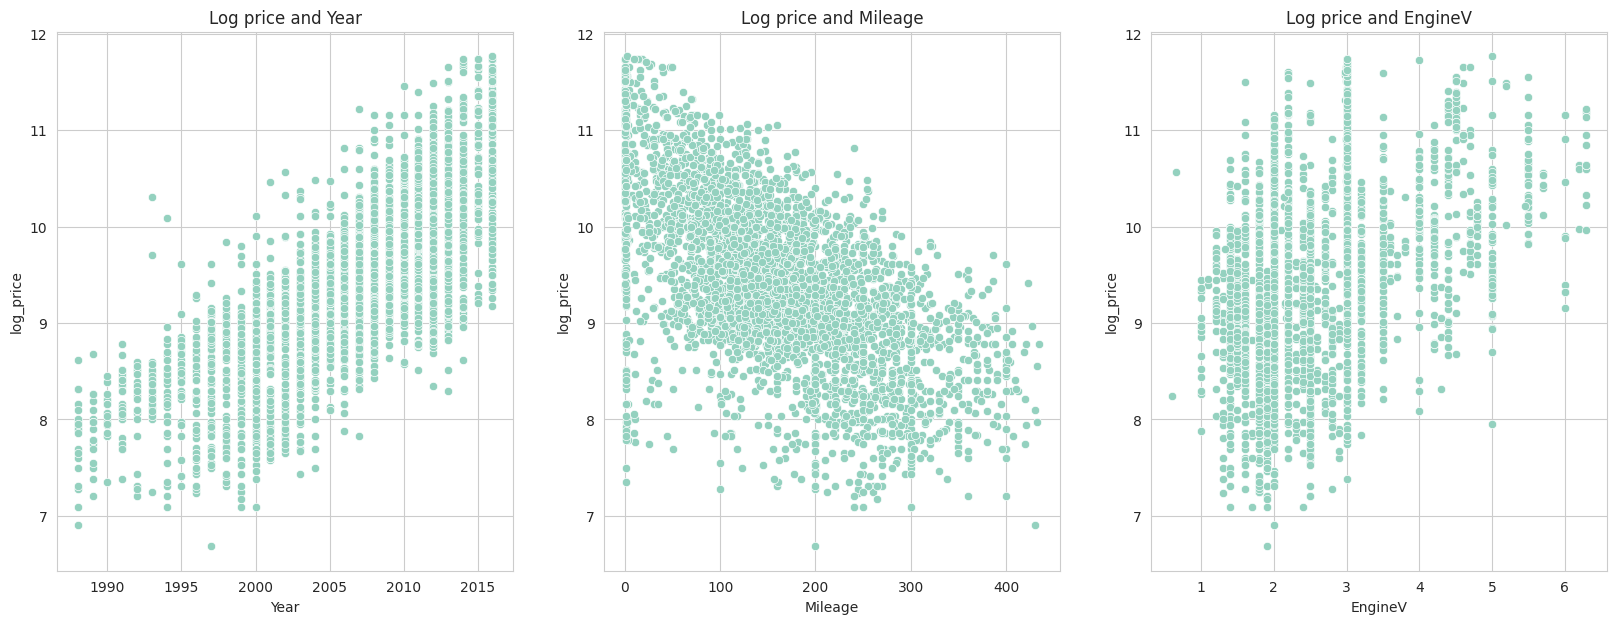

In [77]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV")

# The relationships show a clear linear relationship
# This is some good linear regression material

In [78]:
# Since we will be using the log price variable, we can drop the old 'Price' one
cleaned_data = cleaned_data.drop(['Price'],axis=1)

## Checking Multicollinearity Using VIF

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

VIF Features
0  3.79  Mileage
1 10.35     Year
2  7.66  EngineV

*Fixing Multicollinearity:*

In [80]:
# 'Year' has high VIF so we are just droping that column
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicolinearity = cleaned_data.drop('Year',axis=1)

In [81]:
data_no_multicolinearity.head()

Brand       Body  Mileage  EngineV Engine Type Registration  \
0            BMW      sedan      277     2.00      Petrol          yes   
1  Mercedes-Benz        van      427     2.90      Diesel          yes   
2  Mercedes-Benz      sedan      358     5.00         Gas          yes   
3           Audi  crossover      240     4.20      Petrol          yes   
4         Toyota  crossover      120     2.00      Petrol          yes   

   log_price  
0       8.34  
1       8.97  
2       9.50  
3      10.04  
4       9.81

# Feature Selection

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

In [82]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])

# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Mileage        0.61
Registration   0.46
EngineV        0.41
Body           0.39
Brand          0.10
Engine Type    0.01
dtype: float64


<Axes: >

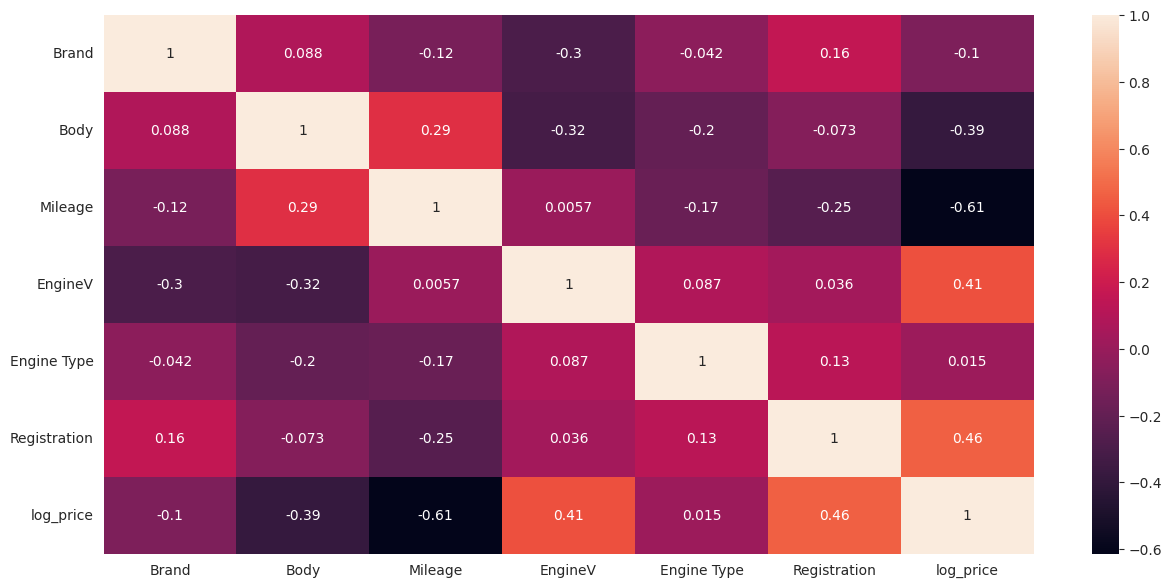

In [83]:
plt.figure(figsize=[15,7])
sns.heatmap(temp_data.corr(), annot=True) # Use temp_data which has encoded categorical features

**Feature Importance**

*Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.*

In [84]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

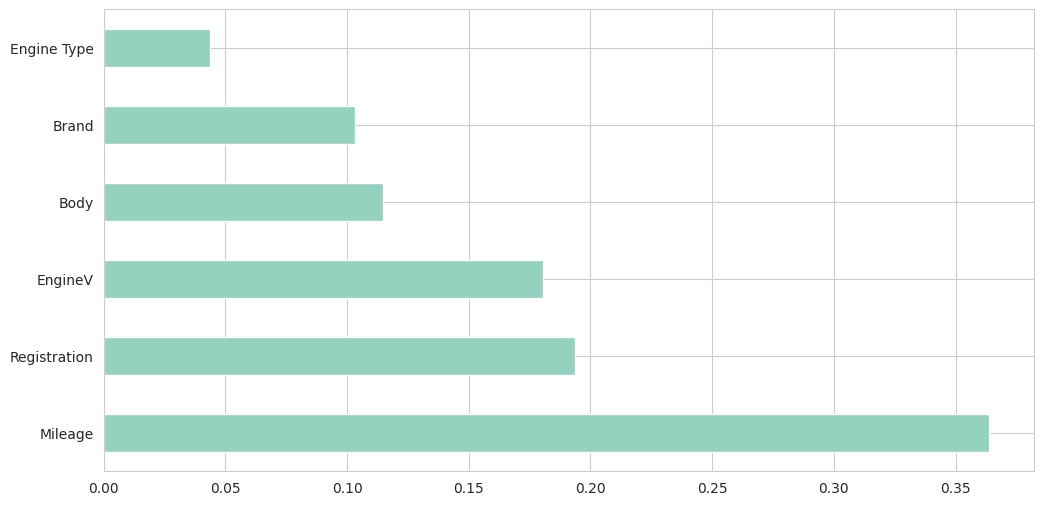

In [85]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [86]:
print(feat_importances.sort_values(ascending=False))

Mileage        0.36
Registration   0.19
EngineV        0.18
Body           0.11
Brand          0.10
Engine Type    0.04
dtype: float64


## Categorical Features

In [87]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [88]:
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277     2.00       8.34       True                False   
1      427     2.90       8.97      False                 True   
2      358     5.00       9.50      False                 True   
3      240     4.20      10.04      False                False   
4      120     2.00       9.81      False                False   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0             False          False         False             False   
1             False          False         False             False   
2             False          False         False             False   
3             False          False         False             False   
4             False          False          True             False   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0       False       False        True       False     False            False   
1       False       False       False       False      True            False   
2       False       False        True       False     False             True   
3       False       False       False       False     False            False   
4       False       False       False       False     False            False   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0              False                True              True  
1              False               False              True  
2              False               False              True  
3              False                True              True  
4              False                True              True

# Model Development

### Declaring dependent and independent variable

In [89]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [91]:
# It is not usually recommended to standardize dummy variables
#For ML purposes we rarely put too much thought into it and go with the scale dummies as
#scaling has no effect on their predictive power.
inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [92]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

## Training and Testing Data

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [94]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7726984972665855
RMSE : 0.4298206539563801


# Random Forest Regressor Model

In [95]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.807884360665094
RMSE : 0.39515500525421043


# GBT Regressor Model

In [96]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8123527048010288
RMSE : 0.39053258985324624


In [97]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.28811245515466416
MSE: 0.15251570373748385
RMSE: 0.39053258985324624


# let's manually check these predictions

In [98]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

Predicted Price  Actual Price  Residual  Difference%
769         24080.20      29500.00   5419.80        18.37
770          9552.79       9600.00     47.21         0.49
771         14320.47      18300.00   3979.53        21.75
772         29363.56      68500.00  39136.44        57.13
773         11213.79      10800.00   -413.79         3.83